NOTE: First I wanted to import all my libraries.

In [60]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
pd.options.display.mpl_style = 'default'


C:\Users\lioncare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

NOTE: The default option for max_columns displayed for pandas is much smaller than the width of the data, so I comfortably extended.

In [62]:
pd.set_option('display.max_columns', 410)
pd.set_option('expand_frame_repr', True)

NOTE: I set the data path based on the file name from Busara 

In [63]:
data_path = '~/Associate_June2017_Data'

In [64]:
saving_habits=pd.read_csv(data_path+'/saving_hab.txt', sep='|', low_memory=False, encoding = "ISO-8859-1")
demographics1=pd.read_csv(data_path+'/demo.txt', sep='|', low_memory=False, encoding = "ISO-8859-1")



NOTE: When I opened the data in excel first to look at it I noticed some inconsistencies, so I did a quick find and replace to clean the obvious discrepancies, for example removing '' to make sure the 'surveyids' would be read as integers. I had some trouble getting the script to output, and so I added the encoding = "ISO-8859-1" because I had found that worked as a fix for some windows running machines on a previous data set. 

NOTE: When I then tried to join the data sets I was encountering error codes. After trying a few potential solutions and troubleshooting, I thought excel may have created some bugs that were causing difficulty. To see if this was the problem I re-saved the data as txt files and found that solved the error codes when it came to joining. 

In [65]:
saving_habits.head (2)

,surveyid,SubmissionDate,starttime,endtime,deviceid,subscriberid,simid,devicephonenum,admin_infob_time,admin_infocalc1,admin_infocalc2,Savc1_1,Savc1_2,Savc1_3,Savsamnt_count,c2_1,c3_1,c2_2,c3_2,c2_3,c3_3,Savc4,Savsg1c6_1,Savsg1c6_2,Savsg1c6_3,Savsg1c6_4,Savsg1c6_5,Savsg1c6_6,Savsg1c6_7,Savsg1c6_8,Savsg1c6i,Savsg1rpt1_count,c9_1,c10_1,c11_1,c9_2,c10_2,c11_2,c9_3,c10_3,c11_3,Savsg1c12,Savsg2c14_1,Savsg2c14_2,Savsg2c14_3,Savsg2c14_4,Savsg2c14_5,Savsg2c14_6,Savsg2c14i,Savsg2rpt2_count,c16_1,c17_1,c18_1,c16_2,c17_2,c18_2,c16_3,c17_3,c18_3,Savsg2c19,Savsg3c21_1,Savsg3c21_2,Savsg3c21_3,Savsg3c21_4,Savsg3c21_5,Savsg3c21_6,Savsg3c21i,Savsg3rpt3_count,c24_1,c25_1,c26_1,c24_2,c25_2,c26_2,c24_3,c25_3,c26_3,c24_4,c25_4,c26_4,Savsg3c27,Savc29_1,Savc29_2,Savc29_3,Savsamnt2_count,c30_1,c31_1,c30_2,c31_2,c30_3,c31_3,Savc32,Savsg4c34_1,Savsg4c34_2,Savsg4c34_3,Savsg4c34_4,Savsg4c34_5,Savsg4c34_6,Savsg4c34_7,Savsg4c34_8,Savsg4c34i,Savsg4rpt4_count,c37_1,c38_1,c39_1,c37_2,c38_2,c39_2,c37_3,c38_3,c39_3,Savsg4c40,Savsg5c42_1,Savsg5c42_2,Savsg5c42_3,Savsg5c42_4,Savsg5c42_5,Savsg5c42_6,Savsg5c42i,Savsg5rpt5_count,c45_1,c46_1,c47_1,c45_2,c46_2,c47_2,c45_3,c46_3,c47_3,Savsg5c48,Savsg6c50_1,Savsg6c50_2,Savsg6c50_3,Savsg6c50_4,Savsg6c50_5,Savsg6c50_6,Savsg6c50i,Savsg6rpt6_count,c53_1,c54_1,c55_1,c53_2,c54_2,c55_2,c53_3,c54_3,c55_3,Savsg6c56,Savc58_1,Savc58_2,Savc58_3,Savc58_4,Savc58_5,Savc58_6,Savc58_7,Savc59,Savrpt7_count,c60_1,c61_1,c62_1,c63_1,c64_1_1,c64_2_1,c64_3_1,c64_4_1,c64_5_1,c64_6_1,c64_7_1,c64_8_1,c64_other1,c65_1,c66_1_1,c66_2_1,c66_3_1,c66_4_1,c66_5_1,c66_6_1,c66_7_1,c66_8_1,c66_other1,c60_2,c61_2,c62_2,c63_2,c64_1_2,c64_2_2,c64_3_2,c64_4_2,c64_5_2,c64_6_2,c64_7_2,c64_8_2,c64_other2,c65_2,c66_1_2,c66_2_2,c66_3_2,c66_4_2,c66_5_2,c66_6_2,c66_7_2,c66_8_2,c66_other2,c60_3,c61_3,c62_3,c63_3,c64_1_3,c64_2_3,c64_3_3,c64_4_3,c64_5_3,c64_6_3,c64_7_3,c64_8_3,c64_other3,c65_3,c66_1_3,c66_2_3,c66_3_3,c66_4_3,c66_5_3,c66_6_3,c66_7_3,c66_8_3,c66_other3,c60_4,c61_4,c62_4,c63_4,c64_1_4,c64_2_4,c64_3_4,c64_4_4,c64_5_4,c64_6_4,c64_7_4,c64_8_4,c64_other4,c65_4,c66_1_4,c66_2_4,c66_3_4,c66_4_4,c66_5_4,c66_6_4,c66_7_4,c66_8_4,c66_other4,c60_5,c61_5,c62_5,c63_5,c64_1_5,c64_2_5,c64_3_5,c64_4_5,c64_5_5,c64_6_5,c64_7_5,c64_8_5,c64_other5,c65_5,c66_1_5,c66_2_5,c66_3_5,c66_4_5,c66_5_5,c66_6_5,c66_7_5,c66_8_5,c66_other5,phonef1,phonef1_other,phonef1_a,phonef2_1,phonef2_2,phonef2_3,phonef2_4,phonef2_5,phoneg1f4,phoneg1f4_other,phoneg1f5,phoneg1f5_other,phoneg1f6,phoneg1f6_other,phoneg1f7,phoneg1f7_other,phoneg1f8,phoneg1f8_other,phoneg2f8_i,phoneg2f9,phoneg2f10,phoneg2f11,phoneg2f12,phoneg2f13,phoneg2f14,phoneg2f15,phoneg2f16,phoneg2f17,into2_1,into2_2,into2_3,into2_4,into2_5,into2_6,into2_7,into2_8,intg1_o_count,o3_1,o5_1,o3_2,o5_2,o3_3,o5_3,o3_4,o5_4,o3_5,o5_5,fina_litfin,litg2,litg4,sav_preflowh1,sav_preflowh2,sav_preflowh3,sav_prefhighh11,sav_prefhighh12,sav_prefhighh13,sav_prefsafeh16,sav_prefsafeh17,sav_prefsafeh18,sav_prefsafeh19,sav_prefsafeh20,sav_prefsafeh21,sav_prefsafeh22,sav_prefacch24,sav_prefacch25,sav_prefacch26,sav_prefacch27,sav_prefacch28,sav_prefacch29,sav_prefacch30,riskg1_rj2,riskg1_rj3,riskg1_rj4,riskg1_rj5,riskg1_rj6,riskj12,riskj13,riskj15,riskj16,riskj17,timek2,timek3,timek4,timek5,timek6,timek7,timek8,timek9,controll1,controll2,controll3,trustn1,trustn2,trustn3,trustn4,trustn5,trustn6,trustn7,trustn8,fo_comments,end_time,metainstanceID,formdef_version,KEY,rand
0,1276,2016-10-19 13:52,2016-10-19 12:51,2016-10-19 13:17,50:46:5d:7a:e1:97,NaN,NaN,NaN,12:51:38,0.259509,25951,Save,Spend,NaN,2,Akiba,400000,Matumizi,100000.0,NaN,NaN,500000,In a bank account,In my mobile money account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Akaunti ya benki,200000.0,3.0,Akaunti ya simu ya mkononi,200000.0,NaN,NaN,NaN,400000.0,Food,Leisure activities,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Chakula,50000.0,2.0,Starehe,50000.0,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Save,Spend,NaN,2,Akiba,35000,Matumizi,15000.0,NaN,NaN,50000

In [66]:
demographics1.tail (2)

,surveyid,demob2,demob3,demob4,demob5,demob6,demob6_other,demob7,demob8,demob8_other,demob9,demob9_other,demob10,demob11,demob11_other,demob12,demob13,demob15,demob16
311,1586,Male,26,Single,Standard 7,Driver,NaN,No,Cash,NaN,Every Day,NaN,TZS 400000-650000,NaN,NaN,656005567,656005567,656005567,656005567
312,1587,Female,36,Married,Standard 7,Salesperson,NaN,No,Cash,NaN,Every Month,NaN,TZS 280000-400000,NaN,NaN,714886502,714886502,714886502,714886502


NOTE: I checked each data set had imported correctly, and then inner joined them on the key "surveyid".

In [67]:
newdf = pd.merge (saving_habits, demographics1, on="surveyid")

NOTE: I checked the data was joined succesfully and named the new data frame 'newdf'.

In [68]:
newdf.head(5)

,surveyid,SubmissionDate,starttime,endtime,deviceid,subscriberid,simid,devicephonenum,admin_infob_time,admin_infocalc1,admin_infocalc2,Savc1_1,Savc1_2,Savc1_3,Savsamnt_count,c2_1,c3_1,c2_2,c3_2,c2_3,c3_3,Savc4,Savsg1c6_1,Savsg1c6_2,Savsg1c6_3,Savsg1c6_4,Savsg1c6_5,Savsg1c6_6,Savsg1c6_7,Savsg1c6_8,Savsg1c6i,Savsg1rpt1_count,c9_1,c10_1,c11_1,c9_2,c10_2,c11_2,c9_3,c10_3,c11_3,Savsg1c12,Savsg2c14_1,Savsg2c14_2,Savsg2c14_3,Savsg2c14_4,Savsg2c14_5,Savsg2c14_6,Savsg2c14i,Savsg2rpt2_count,c16_1,c17_1,c18_1,c16_2,c17_2,c18_2,c16_3,c17_3,c18_3,Savsg2c19,Savsg3c21_1,Savsg3c21_2,Savsg3c21_3,Savsg3c21_4,Savsg3c21_5,Savsg3c21_6,Savsg3c21i,Savsg3rpt3_count,c24_1,c25_1,c26_1,c24_2,c25_2,c26_2,c24_3,c25_3,c26_3,c24_4,c25_4,c26_4,Savsg3c27,Savc29_1,Savc29_2,Savc29_3,Savsamnt2_count,c30_1,c31_1,c30_2,c31_2,c30_3,c31_3,Savc32,Savsg4c34_1,Savsg4c34_2,Savsg4c34_3,Savsg4c34_4,Savsg4c34_5,Savsg4c34_6,Savsg4c34_7,Savsg4c34_8,Savsg4c34i,Savsg4rpt4_count,c37_1,c38_1,c39_1,c37_2,c38_2,c39_2,c37_3,c38_3,c39_3,Savsg4c40,Savsg5c42_1,Savsg5c42_2,Savsg5c42_3,Savsg5c42_4,Savsg5c42_5,Savsg5c42_6,Savsg5c42i,Savsg5rpt5_count,c45_1,c46_1,c47_1,c45_2,c46_2,c47_2,c45_3,c46_3,c47_3,Savsg5c48,Savsg6c50_1,Savsg6c50_2,Savsg6c50_3,Savsg6c50_4,Savsg6c50_5,Savsg6c50_6,Savsg6c50i,Savsg6rpt6_count,c53_1,c54_1,c55_1,c53_2,c54_2,c55_2,c53_3,c54_3,c55_3,Savsg6c56,Savc58_1,Savc58_2,Savc58_3,Savc58_4,Savc58_5,Savc58_6,Savc58_7,Savc59,Savrpt7_count,c60_1,c61_1,c62_1,c63_1,c64_1_1,c64_2_1,c64_3_1,c64_4_1,c64_5_1,c64_6_1,c64_7_1,c64_8_1,c64_other1,c65_1,c66_1_1,c66_2_1,c66_3_1,c66_4_1,c66_5_1,c66_6_1,c66_7_1,c66_8_1,c66_other1,c60_2,c61_2,c62_2,c63_2,c64_1_2,c64_2_2,c64_3_2,c64_4_2,c64_5_2,c64_6_2,c64_7_2,c64_8_2,c64_other2,c65_2,c66_1_2,c66_2_2,c66_3_2,c66_4_2,c66_5_2,c66_6_2,c66_7_2,c66_8_2,c66_other2,c60_3,c61_3,c62_3,c63_3,c64_1_3,c64_2_3,c64_3_3,c64_4_3,c64_5_3,c64_6_3,c64_7_3,c64_8_3,c64_other3,c65_3,c66_1_3,c66_2_3,c66_3_3,c66_4_3,c66_5_3,c66_6_3,c66_7_3,c66_8_3,c66_other3,c60_4,c61_4,c62_4,c63_4,c64_1_4,c64_2_4,c64_3_4,c64_4_4,c64_5_4,c64_6_4,c64_7_4,c64_8_4,c64_other4,c65_4,c66_1_4,c66_2_4,c66_3_4,c66_4_4,c66_5_4,c66_6_4,c66_7_4,c66_8_4,c66_other4,c60_5,c61_5,c62_5,c63_5,c64_1_5,c64_2_5,c64_3_5,c64_4_5,c64_5_5,c64_6_5,c64_7_5,c64_8_5,c64_other5,c65_5,c66_1_5,c66_2_5,c66_3_5,c66_4_5,c66_5_5,c66_6_5,c66_7_5,c66_8_5,c66_other5,phonef1,phonef1_other,phonef1_a,phonef2_1,phonef2_2,phonef2_3,phonef2_4,phonef2_5,phoneg1f4,phoneg1f4_other,phoneg1f5,phoneg1f5_other,phoneg1f6,phoneg1f6_other,phoneg1f7,phoneg1f7_other,phoneg1f8,phoneg1f8_other,phoneg2f8_i,phoneg2f9,phoneg2f10,phoneg2f11,phoneg2f12,phoneg2f13,phoneg2f14,phoneg2f15,phoneg2f16,phoneg2f17,into2_1,into2_2,into2_3,into2_4,into2_5,into2_6,into2_7,into2_8,intg1_o_count,o3_1,o5_1,o3_2,o5_2,o3_3,o5_3,o3_4,o5_4,o3_5,o5_5,fina_litfin,litg2,litg4,sav_preflowh1,sav_preflowh2,sav_preflowh3,sav_prefhighh11,sav_prefhighh12,sav_prefhighh13,sav_prefsafeh16,sav_prefsafeh17,sav_prefsafeh18,sav_prefsafeh19,sav_prefsafeh20,sav_prefsafeh21,sav_prefsafeh22,sav_prefacch24,sav_prefacch25,sav_prefacch26,sav_prefacch27,sav_prefacch28,sav_prefacch29,sav_prefacch30,riskg1_rj2,riskg1_rj3,riskg1_rj4,riskg1_rj5,riskg1_rj6,riskj12,riskj13,riskj15,riskj16,riskj17,timek2,timek3,timek4,timek5,timek6,timek7,timek8,timek9,controll1,controll2,controll3,trustn1,trustn2,trustn3,trustn4,trustn5,trustn6,trustn7,trustn8,fo_comments,end_time,metainstanceID,formdef_version,KEY,rand,demob2,demob3,demob4,demob5,demob6,demob6_other,demob7,demob8,demob8_other,demob9,demob9_other,demob10,demob11,demob11_other,demob12,demob13,demob15,demob16
0,1276,2016-10-19 13:52,2016-10-19 12:51,2016-10-19 13:17,50:46:5d:7a:e1:97,NaN,NaN,NaN,12:51:38,0.259509,25951,Save,Spend,NaN,2,Akiba,400000,Matumizi,100000.0,NaN,NaN,500000,In a bank account,In my mobile money account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Akaunti ya benki,200000.0,3.0,Akaunti ya simu ya mkononi,200000.0,NaN,NaN,NaN,400000.0,Food,Leisure activities,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Chakula,50000.0,2.0,Starehe,50000.0,NaN,NaN

In [76]:
_68.to_csv('table.csv')

NOTE: As I wanted to understand how the prefered savings vehicle varies as a function of the deposit amount, and how the prefered savings vehicle varies as a function of the reason for saving, I made a note for myself of which survey question number responded to those areas.  

#REASON FOR SAVING: 
#c66 Why do you make contributions to the [c61]?

#PREFERED SAVING VEHICLE:
#c6 Where would you save the amount of money?
#c34 Where would you save the amount of money? (confirming c6)
#c58 Which of these do you actually use to save/keep money? (may relate more to what has access to now not what is prefered)

#DEPOSIT AMOUNT: 
#Savings Habits > savg1 (1)
#c3 How much would you [c2]?
#c31 How much would you [c30]? (confirming)


NOTE: I wanted to see some of the data and check there weren't unexpected values, and get a sense for response rate.

In [69]:
#c6 Where would you save the amount of money?
newdf.Savsg1c6_1

0               In a bank account
1               In a bank account
2      In my mobile money account
3      In my mobile money account
4               In a bank account
5               In a bank account
6                             NaN
7                             NaN
8      In my mobile money account
9      In my mobile money account
10                            NaN
11                            NaN
12                            NaN
13                            NaN
14                            NaN
15                            NaN
16                            NaN
17                            NaN
18     In my mobile money account
19               In my Kibubu box
20                            NaN
21                            NaN
22     In my mobile money account
23     In my mobile money account
24     In my mobile money account
25                            NaN
26                            NaN
27     In my mobile money account
28     In my mobile money account
29            

NOTE: Now I wanted to see if the preferred savings vehicle varied as a function of the deposit amount. To do this would take a couple of steps. First, I applied a function to every row in the df, to then be able to collect each of the savings amounts into one new added column called 'savings_amount'. 

In [70]:
newdf['savings_amount'] = newdf.apply(lambda row: row['c3_1'] if row['Savc1_1'] == 'Save' else (row['c3_2'] if row['Savc1_2'] == 'Save' else (row['c3_3'] if row['Savc1_3'] == 'Save' else 0.0)), axis=1)

NOTE: I checked whether it had worked. 

In [71]:
newdf.head(2)

,surveyid,SubmissionDate,starttime,endtime,deviceid,subscriberid,simid,devicephonenum,admin_infob_time,admin_infocalc1,admin_infocalc2,Savc1_1,Savc1_2,Savc1_3,Savsamnt_count,c2_1,c3_1,c2_2,c3_2,c2_3,c3_3,Savc4,Savsg1c6_1,Savsg1c6_2,Savsg1c6_3,Savsg1c6_4,Savsg1c6_5,Savsg1c6_6,Savsg1c6_7,Savsg1c6_8,Savsg1c6i,Savsg1rpt1_count,c9_1,c10_1,c11_1,c9_2,c10_2,c11_2,c9_3,c10_3,c11_3,Savsg1c12,Savsg2c14_1,Savsg2c14_2,Savsg2c14_3,Savsg2c14_4,Savsg2c14_5,Savsg2c14_6,Savsg2c14i,Savsg2rpt2_count,c16_1,c17_1,c18_1,c16_2,c17_2,c18_2,c16_3,c17_3,c18_3,Savsg2c19,Savsg3c21_1,Savsg3c21_2,Savsg3c21_3,Savsg3c21_4,Savsg3c21_5,Savsg3c21_6,Savsg3c21i,Savsg3rpt3_count,c24_1,c25_1,c26_1,c24_2,c25_2,c26_2,c24_3,c25_3,c26_3,c24_4,c25_4,c26_4,Savsg3c27,Savc29_1,Savc29_2,Savc29_3,Savsamnt2_count,c30_1,c31_1,c30_2,c31_2,c30_3,c31_3,Savc32,Savsg4c34_1,Savsg4c34_2,Savsg4c34_3,Savsg4c34_4,Savsg4c34_5,Savsg4c34_6,Savsg4c34_7,Savsg4c34_8,Savsg4c34i,Savsg4rpt4_count,c37_1,c38_1,c39_1,c37_2,c38_2,c39_2,c37_3,c38_3,c39_3,Savsg4c40,Savsg5c42_1,Savsg5c42_2,Savsg5c42_3,Savsg5c42_4,Savsg5c42_5,Savsg5c42_6,Savsg5c42i,Savsg5rpt5_count,c45_1,c46_1,c47_1,c45_2,c46_2,c47_2,c45_3,c46_3,c47_3,Savsg5c48,Savsg6c50_1,Savsg6c50_2,Savsg6c50_3,Savsg6c50_4,Savsg6c50_5,Savsg6c50_6,Savsg6c50i,Savsg6rpt6_count,c53_1,c54_1,c55_1,c53_2,c54_2,c55_2,c53_3,c54_3,c55_3,Savsg6c56,Savc58_1,Savc58_2,Savc58_3,Savc58_4,Savc58_5,Savc58_6,Savc58_7,Savc59,Savrpt7_count,c60_1,c61_1,c62_1,c63_1,c64_1_1,c64_2_1,c64_3_1,c64_4_1,c64_5_1,c64_6_1,c64_7_1,c64_8_1,c64_other1,c65_1,c66_1_1,c66_2_1,c66_3_1,c66_4_1,c66_5_1,c66_6_1,c66_7_1,c66_8_1,c66_other1,c60_2,c61_2,c62_2,c63_2,c64_1_2,c64_2_2,c64_3_2,c64_4_2,c64_5_2,c64_6_2,c64_7_2,c64_8_2,c64_other2,c65_2,c66_1_2,c66_2_2,c66_3_2,c66_4_2,c66_5_2,c66_6_2,c66_7_2,c66_8_2,c66_other2,c60_3,c61_3,c62_3,c63_3,c64_1_3,c64_2_3,c64_3_3,c64_4_3,c64_5_3,c64_6_3,c64_7_3,c64_8_3,c64_other3,c65_3,c66_1_3,c66_2_3,c66_3_3,c66_4_3,c66_5_3,c66_6_3,c66_7_3,c66_8_3,c66_other3,c60_4,c61_4,c62_4,c63_4,c64_1_4,c64_2_4,c64_3_4,c64_4_4,c64_5_4,c64_6_4,c64_7_4,c64_8_4,c64_other4,c65_4,c66_1_4,c66_2_4,c66_3_4,c66_4_4,c66_5_4,c66_6_4,c66_7_4,c66_8_4,c66_other4,c60_5,c61_5,c62_5,c63_5,c64_1_5,c64_2_5,c64_3_5,c64_4_5,c64_5_5,c64_6_5,c64_7_5,c64_8_5,c64_other5,c65_5,c66_1_5,c66_2_5,c66_3_5,c66_4_5,c66_5_5,c66_6_5,c66_7_5,c66_8_5,c66_other5,phonef1,phonef1_other,phonef1_a,phonef2_1,phonef2_2,phonef2_3,phonef2_4,phonef2_5,phoneg1f4,phoneg1f4_other,phoneg1f5,phoneg1f5_other,phoneg1f6,phoneg1f6_other,phoneg1f7,phoneg1f7_other,phoneg1f8,phoneg1f8_other,phoneg2f8_i,phoneg2f9,phoneg2f10,phoneg2f11,phoneg2f12,phoneg2f13,phoneg2f14,phoneg2f15,phoneg2f16,phoneg2f17,into2_1,into2_2,into2_3,into2_4,into2_5,into2_6,into2_7,into2_8,intg1_o_count,o3_1,o5_1,o3_2,o5_2,o3_3,o5_3,o3_4,o5_4,o3_5,o5_5,fina_litfin,litg2,litg4,sav_preflowh1,sav_preflowh2,sav_preflowh3,sav_prefhighh11,sav_prefhighh12,sav_prefhighh13,sav_prefsafeh16,sav_prefsafeh17,sav_prefsafeh18,sav_prefsafeh19,sav_prefsafeh20,sav_prefsafeh21,sav_prefsafeh22,sav_prefacch24,sav_prefacch25,sav_prefacch26,sav_prefacch27,sav_prefacch28,sav_prefacch29,sav_prefacch30,riskg1_rj2,riskg1_rj3,riskg1_rj4,riskg1_rj5,riskg1_rj6,riskj12,riskj13,riskj15,riskj16,riskj17,timek2,timek3,timek4,timek5,timek6,timek7,timek8,timek9,controll1,controll2,controll3,trustn1,trustn2,trustn3,trustn4,trustn5,trustn6,trustn7,trustn8,fo_comments,end_time,metainstanceID,formdef_version,KEY,rand,demob2,demob3,demob4,demob5,demob6,demob6_other,demob7,demob8,demob8_other,demob9,demob9_other,demob10,demob11,demob11_other,demob12,demob13,demob15,demob16,savings_amount
0,1276,2016-10-19 13:52,2016-10-19 12:51,2016-10-19 13:17,50:46:5d:7a:e1:97,NaN,NaN,NaN,12:51:38,0.259509,25951,Save,Spend,NaN,2,Akiba,400000,Matumizi,100000.0,NaN,NaN,500000,In a bank account,In my mobile money account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Akaunti ya benki,200000.0,3.0,Akaunti ya simu ya mkononi,200000.0,NaN,NaN,NaN,400000.0,Food,Leisure activities,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Chakula,50000.0,2.0,Starehe,

NOTE: Then I grouped by where each prefered saving place was (Savsg1c6_1) and took the average within each of the groups.

In [72]:
newdf.groupby('Savsg1c6_1').mean()

,surveyid,subscriberid,devicephonenum,admin_infocalc1,admin_infocalc2,Savsamnt_count,c3_1,c3_2,c3_3,Savc4,Savsg1c6_4,Savsg1c6_5,Savsg1c6_6,Savsg1c6_7,Savsg1c6_8,Savsg1rpt1_count,c9_1,c11_1,c9_2,c11_2,c9_3,c11_3,Savsg1c12,Savsg2c14_4,Savsg2c14_5,Savsg2c14_6,Savsg2rpt2_count,c16_1,c18_1,c16_2,c18_2,c16_3,c18_3,Savsg2c19,Savsg3c21_4,Savsg3c21_5,Savsg3c21_6,Savsg3rpt3_count,c24_1,c26_1,c24_2,c26_2,c24_3,c26_3,c24_4,c25_4,c26_4,Savsg3c27,Savsamnt2_count,c31_1,c31_2,c31_3,Savc32,Savsg4c34_4,Savsg4c34_5,Savsg4c34_6,Savsg4c34_7,Savsg4c34_8,Savsg4c34i,Savsg4rpt4_count,c37_1,c39_1,c37_2,c39_2,c37_3,c39_3,Savsg4c40,Savsg5c42_4,Savsg5c42_5,Savsg5c42_6,Savsg5rpt5_count,c45_1,c47_1,c45_2,c47_2,c45_3,c47_3,Savsg5c48,Savsg6c50_2,Savsg6c50_3,Savsg6c50_4,Savsg6c50_5,Savsg6c50_6,Savsg6rpt6_count,c53_1,c55_1,c53_2,c54_2,c55_2,c53_3,c54_3,c55_3,Savsg6c56,Savc58_5,Savc58_6,Savc58_7,Savrpt7_count,c60_1,c62_1,c64_6_1,c64_7_1,c64_8_1,c66_6_1,c66_7_1,c66_8_1,c60_2,c62_2,c64_4_2,c64_5_2,c64_6_2,c64_7_2,c64_8_2,c66_5_2,c66_6_2,c66_7_2,c66_8_2,c60_3,c62_3,c64_3_3,c64_4_3,c64_5_3,c64_6_3,c64_7_3,c64_8_3,c66_4_3,c66_5_3,c66_6_3,c66_7_3,c66_8_3,c60_4,c62_4,c64_4_4,c64_5_4,c64_6_4,c64_7_4,c64_8_4,c64_other4,c66_5_4,c66_6_4,c66_7_4,c66_8_4,c60_5,c61_5,c62_5,c63_5,c64_1_5,c64_2_5,c64_3_5,c64_4_5,c64_5_5,c64_6_5,c64_7_5,c64_8_5,c64_other5,c65_5,c66_1_5,c66_2_5,c66_3_5,c66_4_5,c66_5_5,c66_6_5,c66_7_5,c66_8_5,c66_other5,phonef1_other,phonef1_a,phonef2_4,phonef2_5,phoneg1f4_other,phoneg1f5_other,phoneg1f6_other,into2_6,into2_7,into2_8,intg1_o_count,o5_1,o5_2,o5_3,o5_4,o5_5,sav_prefsafeh16,sav_prefsafeh17,sav_prefsafeh18,sav_prefsafeh19,sav_prefsafeh20,sav_prefsafeh21,sav_prefsafeh22,sav_prefacch24,sav_prefacch25,sav_prefacch26,sav_prefacch27,sav_prefacch28,sav_prefacch29,sav_prefacch30,riskj17,formdef_version,rand,demob3,demob11_other,demob12,demob13,demob15,demob16,savings_amount
Savsg1c6_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
In a VICOBA,1386.500000,NaN,NaN,0.445036,44503.500000,2.000000,275000.000000,225000.000000,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,1.000000,7.0,275000.000000,NaN,NaN,NaN,NaN,275000.000000,NaN,NaN,NaN,1.000000,6.000000,250000.0,NaN,NaN,NaN,NaN,250000.000000,NaN,NaN,NaN,1.000000,5.000000,200000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000.000000,1.000000,50000.000000,NaN,NaN,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,3.500000,50000.000000,NaN,NaN,NaN,NaN,50000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,-98.000000,-98.000000,500000.0,NaN,NaN,2.000000,5.500000,3.500000,3.500000,5.500000,2.000000,4.000000,4.000000,1.500000,2.500000,3.000000,3.500000,1.500000,1.500000,15000.000000,21.000000,0.883430,41.000000,NaN,7.364727e+08,7.364727e+08,7.634727e+08,7.634727e+08,275000.000000
In a bank account,1345.954545,6.400929e+14,NaN,0.523469,52346.863636,1.340909,434772.727273,191333.333333,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,1.181818,2.0,422272.727273,3.00,112500.0,NaN,NaN,442727.272727,NaN,NaN,NaN,1.875000,1.125000,56875.0,3.000000,41666.666667,4.0,15000.0,90000.000000,NaN,NaN,NaN,1.142857,3.714286,264285.714286,2.0,100000.0,NaN,NaN,NaN,NaN,NaN,278571.428571,1.090909,48636.363636,15000.000000,NaN,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.541667,47500.000000,NaN,NaN,NaN,NaN,47500.000000,NaN,NaN,NaN,1.00,1.526316,42631.578947,NaN,NaN,NaN,NaN,42631.578947,NaN,NaN,NaN,NaN,NaN,1.0,4.2,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,1.795455,1.818182,3412.931818,NaN,NaN,

NOTE: This gave me all of the averages, so I pulled out just the new column 'savings_amount'. 

In [73]:
newdf.groupby('Savsg1c6_1').mean()['savings_amount']


Savsg1c6_1
In a VICOBA                    275000.000000
In a bank account              434772.727273
In a chama                     350000.000000
In a safe place in my house    366666.666667
In my Kibubu box               366666.666667
In my mobile money account     376633.663366
Other                          500000.000000
Name: savings_amount, dtype: float64

NOTE: I wanted to plot the graph to get a quick sense of the results and to 'sanity check' that preferences would be within reasonable expectations, which they were. 

(0, 110)

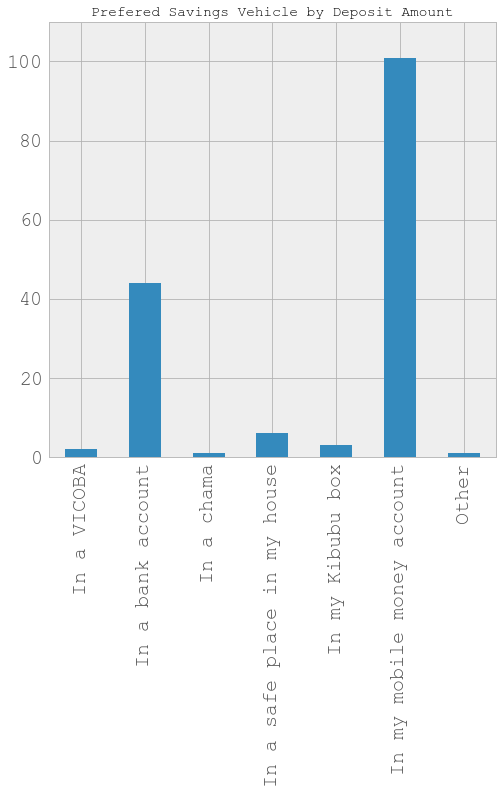

In [74]:
newdf['Savsg1c6_1'].value_counts().sort_index().plot(kind='bar',title='Prefered Savings Vehicle by Deposit Amount', fontsize=20, figsize=(8, 8))
plt.ylim((0, 110))

NOTE: I wanted to now see how the prefered savings vehicle varies as a function of the reason for saving. The deposit amount in the above question was an integer, allowing me to take an average for a simple snapshot analysis. For this question, I decided to group both of the columns, and then just take a count of how many times each group occurred. 

In [75]:
newdf.groupby(['c66_1_1','Savsg1c6_1']).size()

c66_1_1                                      Savsg1c6_1                 
Education for my children                    In a bank account               5
                                             In a safe place in my house     1
                                             In my mobile money account     10
                                             Other                           1
Education for myself                         In a bank account               5
                                             In my mobile money account      4
For medical emergencies                      In a bank account               4
                                             In a safe place in my house     3
                                             In my Kibubu box                1
                                             In my mobile money account     25
To build/ improve my house                   In a bank account               8
                                             In my mobile 

NOTE: 'Sanity checking' this, it made sense that "in my mobile money account" was such a strong response, as we saw from the same data points in the chart above. But this gave more information about the motivation behind those savings preferences. 